In [1]:
from pycaret.classification import *
import pandas as pd

In [2]:
df = pd.read_csv("..\data\creditcard.csv")


In [3]:
data_unseen = df.sample(frac = 0.3, random_state = 42)   
data = df.drop(data_unseen.index)                       

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

In [4]:
expt_intermediate = setup(
    data = data, 
    target = 'Class', 
    session_id=42,                     
    train_size=0.8,                     
    normalize=True,
    normalize_method="minmax",
    polynomial_features=True,
    trigonometry_features=True,
    fix_imbalance = True,
)

,Description,Value
0,session_id,42
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(199365, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [5]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [6]:
top5 = compare_models(sort="F1",exclude = ['rbfsvm','gpc','mlp','gbc','lr','svm','nb','lda'] , fold=2, n_select=5)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9995,0.9706,0.7953,0.9229,0.8541,0.8539,0.8564,9.2250
rf,Random Forest Classifier,0.9994,0.9645,0.7718,0.8769,0.8199,0.8196,0.8218,23.0600
lightgbm,Light Gradient Boosting Machine,0.9993,0.9761,0.8188,0.8138,0.8160,0.8156,0.8158,3.7400
dt,Decision Tree Classifier,0.9975,0.8514,0.7047,0.4091,0.5171,0.5160,0.5355,12.3000
knn,K Neighbors Classifier,0.9960,0.8897,0.7550,0.2871,0.4155,0.4140,0.4638,57.0000
qda,Quadratic Discriminant Analysis,0.9950,0.9472,0.8389,0.2505,0.3856,0.3838,0.4567,2.4550
ada,Ada Boost Classifier,0.9877,0.9525,0.8456,0.1167,0.2051,0.2025,0.3115,29.2700
ridge,Ridge Classifier,0.9833,0.0000,0.8591,0.0899,0.1626,0.1598,0.2745,1.6200


In [7]:
for model in top5:
    print(model)
    print()

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=Fals

In [8]:
blended_model = top5[0]

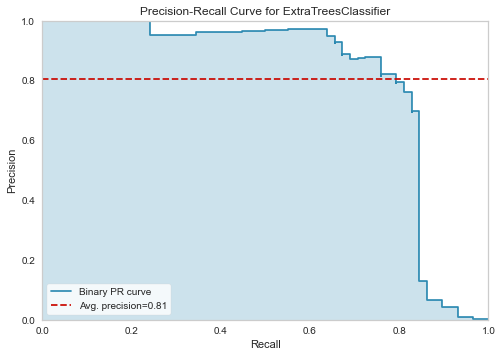

In [9]:
plot_model(blended_model, plot = "pr")

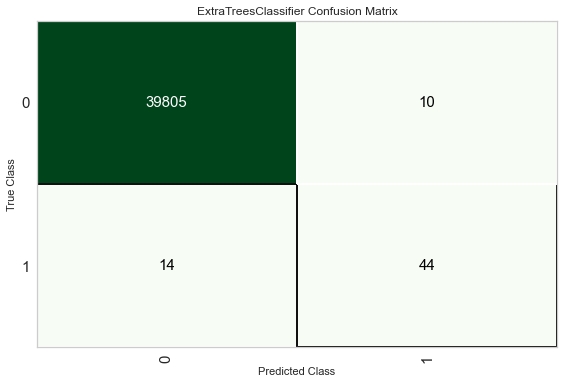

In [10]:
plot_model(blended_model, plot="confusion_matrix")

In [11]:
predict_model(blended_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9994,0.9742,0.7586,0.8148,0.7857,0.7854,0.7859


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V17_Power2,cos(V11),V9_Power2,sin(V4),V10_Power2,cos(V17),V14_Power2,Class,Label,Score
0,0.427132,0.977317,0.765129,0.936784,0.322196,0.763699,0.273871,0.262143,0.788877,0.617081,...,0.000337,0.371407,0.009310,0.999654,0.000298,0.947600,1.821695e-03,0,0,1.00
1,0.724177,0.993804,0.765736,0.891665,0.255944,0.768615,0.260289,0.265700,0.784155,0.578332,...,0.001357,0.999868,0.000764,0.524816,0.000099,0.800191,4.875990e-04,0,0,1.00
2,0.274706,0.979439,0.758300,0.926924,0.230384,0.758521,0.260457,0.260987,0.787116,0.541521,...,0.001375,0.698173,0.001427,0.250320,0.000757,0.797678,1.278210e-04,0,0,1.00
3,0.310599,0.924237,0.750267,0.945796,0.278859,0.784876,0.244042,0.262578,0.785704,0.557010,...,0.000877,0.962247,0.000105,0.766821,0.000013,0.867496,4.238701e-04,0,0,1.00
4,0.455472,0.937606,0.769452,0.964095,0.225374,0.756519,0.263709,0.263028,0.791869,0.512608,...,0.000745,0.574531,0.007947,0.203381,0.000190,0.886605,4.861928e-05,0,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39868,0.233165,0.974834,0.764642,0.922235,0.316725,0.764420,0.263386,0.266113,0.785916,0.583497,...,0.000068,0.740787,0.001355,0.993635,0.000032,0.989319,2.713850e-04,0,0,0.99
39869,0.270423,0.953461,0.728760,0.936303,0.282093,0.746588,0.268969,0.262545,0.785567,0.590912,...,0.000838,0.560683,0.002499,0.796729,0.000037,0.873112,4.328918e-03,0,0,1.00
39870,0.460779,0.976869,0.760866,0.934502,0.227846,0.757736,0.257495,0.262221,0.786141,0.645086,...,0.000402,0.988988,0.021390,0.226106,0.002224,0.937637,4.644634e-09,0,0,0.99
39871,0.895146,0.993972,0.767127,0.880885,0.230147,0.770229,0.252935,0.268818,0.781075,0.548351,...,0.000373,0.592608,0.000657,0.248016,0.000101,0.942046,1.156047e-03,0,0,1.00


In [15]:
save_model(blended_model, '../models/blended')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Class',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nod

In [13]:
unseen_predictions = predict_model(blended_model, data = data_unseen)
unseen_predictions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Label,Score
0,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1,1,0.98
1,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0,0,1.00
2,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0,0,1.00
3,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0,0,1.00
4,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0,0,1.00


In [16]:
from pycaret.utils import check_metric

In [18]:
predict_model(blended_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9994,0.9742,0.7586,0.8148,0.7857,0.7854,0.7859


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V17_Power2,cos(V11),V9_Power2,sin(V4),V10_Power2,cos(V17),V14_Power2,Class,Label,Score
0,0.427132,0.977317,0.765129,0.936784,0.322196,0.763699,0.273871,0.262143,0.788877,0.617081,...,0.000337,0.371407,0.009310,0.999654,0.000298,0.947600,1.821695e-03,0,0,1.00
1,0.724177,0.993804,0.765736,0.891665,0.255944,0.768615,0.260289,0.265700,0.784155,0.578332,...,0.001357,0.999868,0.000764,0.524816,0.000099,0.800191,4.875990e-04,0,0,1.00
2,0.274706,0.979439,0.758300,0.926924,0.230384,0.758521,0.260457,0.260987,0.787116,0.541521,...,0.001375,0.698173,0.001427,0.250320,0.000757,0.797678,1.278210e-04,0,0,1.00
3,0.310599,0.924237,0.750267,0.945796,0.278859,0.784876,0.244042,0.262578,0.785704,0.557010,...,0.000877,0.962247,0.000105,0.766821,0.000013,0.867496,4.238701e-04,0,0,1.00
4,0.455472,0.937606,0.769452,0.964095,0.225374,0.756519,0.263709,0.263028,0.791869,0.512608,...,0.000745,0.574531,0.007947,0.203381,0.000190,0.886605,4.861928e-05,0,0,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39868,0.233165,0.974834,0.764642,0.922235,0.316725,0.764420,0.263386,0.266113,0.785916,0.583497,...,0.000068,0.740787,0.001355,0.993635,0.000032,0.989319,2.713850e-04,0,0,0.99
39869,0.270423,0.953461,0.728760,0.936303,0.282093,0.746588,0.268969,0.262545,0.785567,0.590912,...,0.000838,0.560683,0.002499,0.796729,0.000037,0.873112,4.328918e-03,0,0,1.00
39870,0.460779,0.976869,0.760866,0.934502,0.227846,0.757736,0.257495,0.262221,0.786141,0.645086,...,0.000402,0.988988,0.021390,0.226106,0.002224,0.937637,4.644634e-09,0,0,0.99
39871,0.895146,0.993972,0.767127,0.880885,0.230147,0.770229,0.252935,0.268818,0.781075,0.548351,...,0.000373,0.592608,0.000657,0.248016,0.000101,0.942046,1.156047e-03,0,0,1.00
